In [1]:
import numpy
import matplotlib
import pandas
import seaborn
import sklearn

In [2]:
alpha = pandas.read_csv('energyDataset/PJME_hourly.csv')

In [3]:
#alpha

In [4]:
#conda install -c conda-forge prophet

In [5]:
import prophet


In [6]:
alpha=alpha.set_index('Datetime')

In [7]:
alpha.index=pandas.to_datetime(alpha.index)

In [8]:
alpha.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='PJME MW')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

NameError: name 'color_pal' is not defined

In [9]:
xTrain = alpha.loc[alpha.index<='1-Jan-2015']
xTest =alpha.loc[alpha.index>'1-Jan-2015']

In [10]:
#xTrain
#xTest

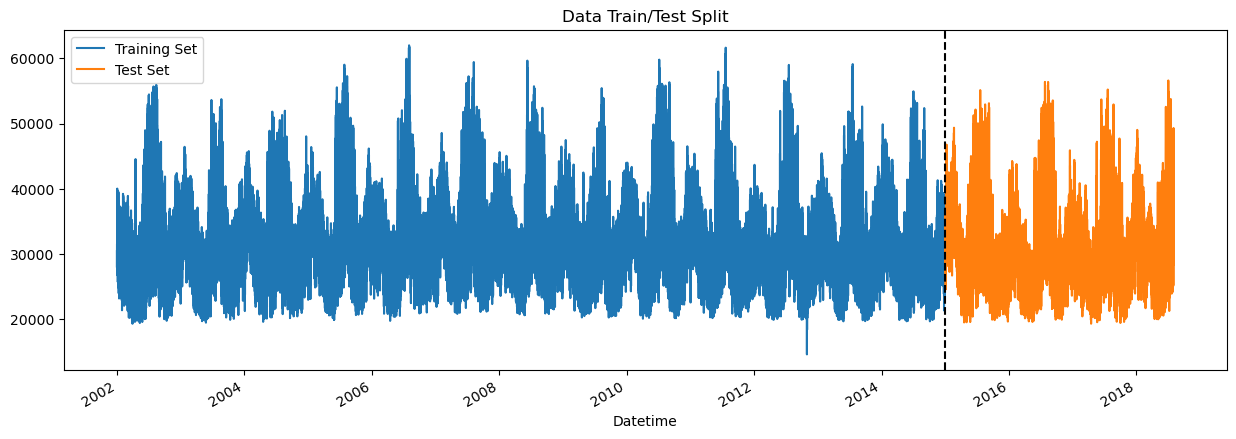

In [11]:
fig, ax = matplotlib.pyplot.subplots(figsize=(15, 5))
xTrain.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
xTest.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
matplotlib.pyplot.show()

# prophet model training

In [12]:
#Prophet is not as simple as XGBoost
#we need to pass the datetime as a seperate column (not index) and to name int 'ds'
#and the values in a 'y' column

In [13]:
xTrainPro= xTrain.reset_index().rename(columns={'Datetime':'ds','PJME_MW':'y'})

In [14]:
#xTrainPro

In [15]:
machine = prophet.Prophet()

In [16]:
machine.fit(xTrainPro)
#it may takes more than 10mins

C:\Users\konst\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [17]:
xTestPro = xTest.reset_index().rename(columns={'Datetime':'ds','PJME_MW':'y'})

In [18]:
predictions = machine.predict(xTestPro)

C:\Users\konst\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\konst\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [19]:
predictions
#prophet returns a whole new dataset with analytical values
#the last column 'yhat' is the final prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31209.322697,23762.998850,32854.174304,31209.322697,31209.322697,-2823.261647,-2823.261647,-2823.261647,-4430.381997,...,1281.422392,1281.422392,1281.422392,325.697958,325.697958,325.697958,0.0,0.0,0.0,28386.061050
1,2015-01-01 02:00:00,31209.284876,22217.701992,31453.654854,31209.284876,31209.284876,-4327.708248,-4327.708248,-4327.708248,-5927.391284,...,1272.663684,1272.663684,1272.663684,327.019351,327.019351,327.019351,0.0,0.0,0.0,26881.576628
2,2015-01-01 03:00:00,31209.247055,21402.567684,30536.429512,31209.247055,31209.247055,-5199.396321,-5199.396321,-5199.396321,-6790.477791,...,1262.699251,1262.699251,1262.699251,328.382219,328.382219,328.382219,0.0,0.0,0.0,26009.850734
3,2015-01-01 04:00:00,31209.209234,21576.531357,30662.703638,31209.209234,31209.209234,-5340.838206,-5340.838206,-5340.838206,-6922.277506,...,1251.652713,1251.652713,1251.652713,329.786587,329.786587,329.786587,0.0,0.0,0.0,25868.371028
4,2015-01-01 05:00:00,31209.171413,21744.082209,31223.978412,31209.171413,31209.171413,-4666.351087,-4666.351087,-4666.351087,-6237.243470,...,1239.659902,1239.659902,1239.659902,331.232480,331.232480,331.232480,0.0,0.0,0.0,26542.820326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31434,2018-08-02 20:00:00,30020.426056,-9769.136457,89651.325342,-19353.133809,77961.921421,11247.952419,11247.952419,11247.952419,4451.026214,...,1033.910256,1033.910256,1033.910256,5763.015948,5763.015948,5763.015948,0.0,0.0,0.0,41268.378474
31435,2018-08-02 21:00:00,30020.388235,-9688.139271,88426.422171,-19355.002439,77963.358615,10475.217771,10475.217771,10475.217771,3695.852267,...,1021.294258,1021.294258,1021.294258,5758.071245,5758.071245,5758.071245,0.0,0.0,0.0,40495.606005
31436,2018-08-02 22:00:00,30020.350414,-11350.725207,87432.069951,-19356.871070,77964.795810,8846.096067,8846.096067,8846.096067,2084.451187,...,1008.519848,1008.519848,1008.519848,5753.125033,5753.125033,5753.125033,0.0,0.0,0.0,38866.446481
31437,2018-08-02 23:00:00,30020.312593,-13380.570149,85296.071589,-19358.739701,77966.233005,6638.420912,6638.420912,6638.420912,-105.149384,...,995.392898,995.392898,995.392898,5748.177398,5748.177398,5748.177398,0.0,0.0,0.0,36658.733505


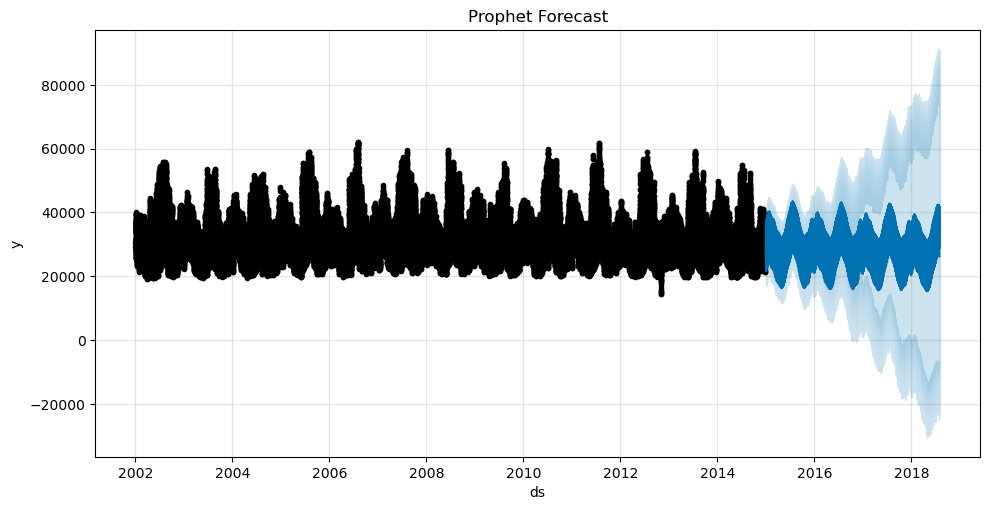

In [20]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10, 5))
fig = machine.plot(predictions, ax=ax)
ax.set_title('Prophet Forecast')
matplotlib.pyplot.show()

In [21]:
#blue = prediction
#light blue = false value range

C:\Users\konst\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\konst\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\konst\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


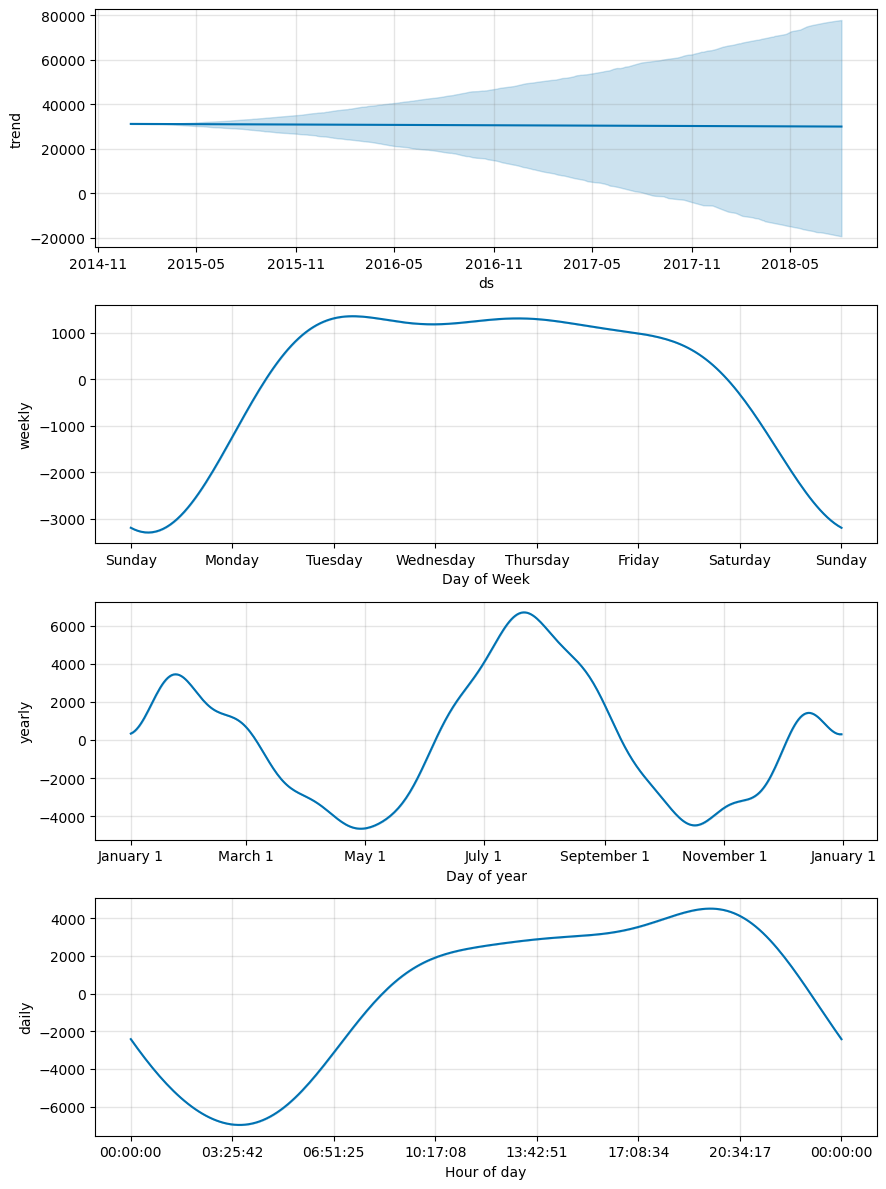

In [22]:
fig = machine.plot_components(predictions)
matplotlib.pyplot.show()

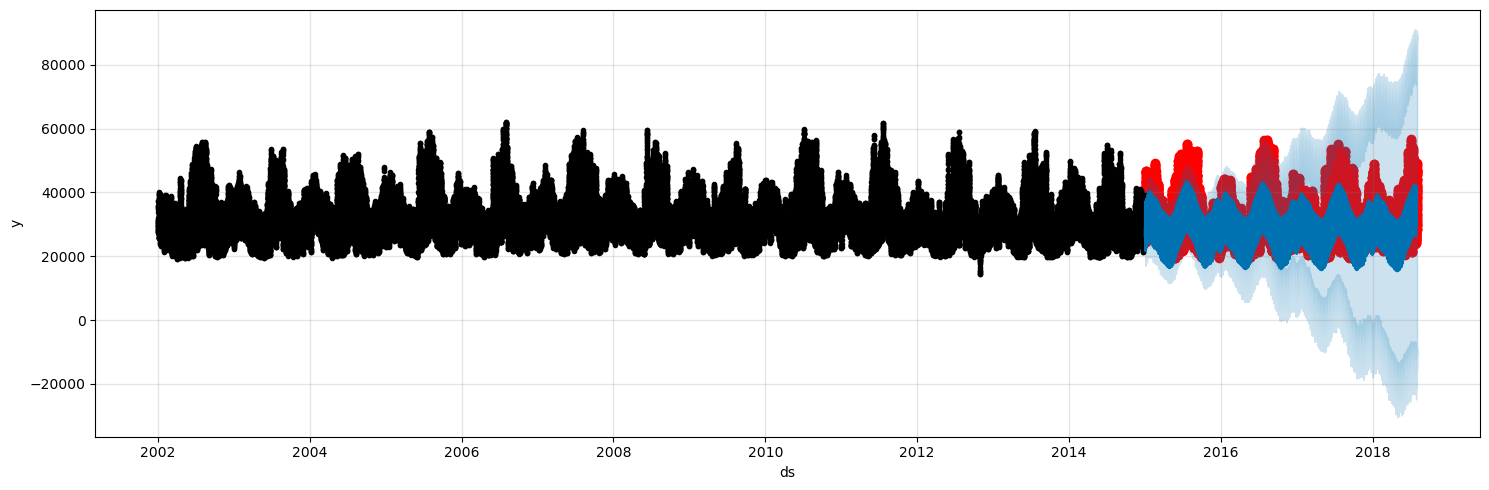

In [23]:
f, ax = matplotlib.pyplot.subplots(figsize=(15, 5))
ax.scatter(xTest.index, xTest['PJME_MW'], color='r')
fig = machine.plot(predictions, ax=ax)

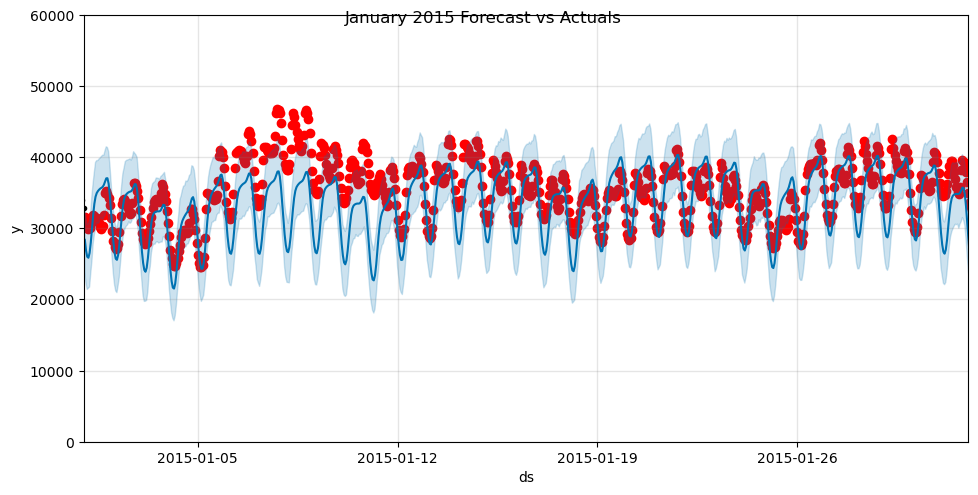

In [24]:
#xTest.index = pandas.to_datetime(xTest.index) #arleady done

fig, ax = matplotlib.pyplot.subplots(figsize=(10, 5))
ax.scatter(xTest.index, xTest['PJME_MW'], color='r')
fig = machine.plot(predictions, ax=ax)
ax.set_xbound(lower=pandas.Timestamp('2015-01-01'),
              upper=pandas.Timestamp('2015-02-01'))
ax.set_ylim(0, 60000)
plot = matplotlib.pyplot.suptitle('January 2015 Forecast vs Actuals')

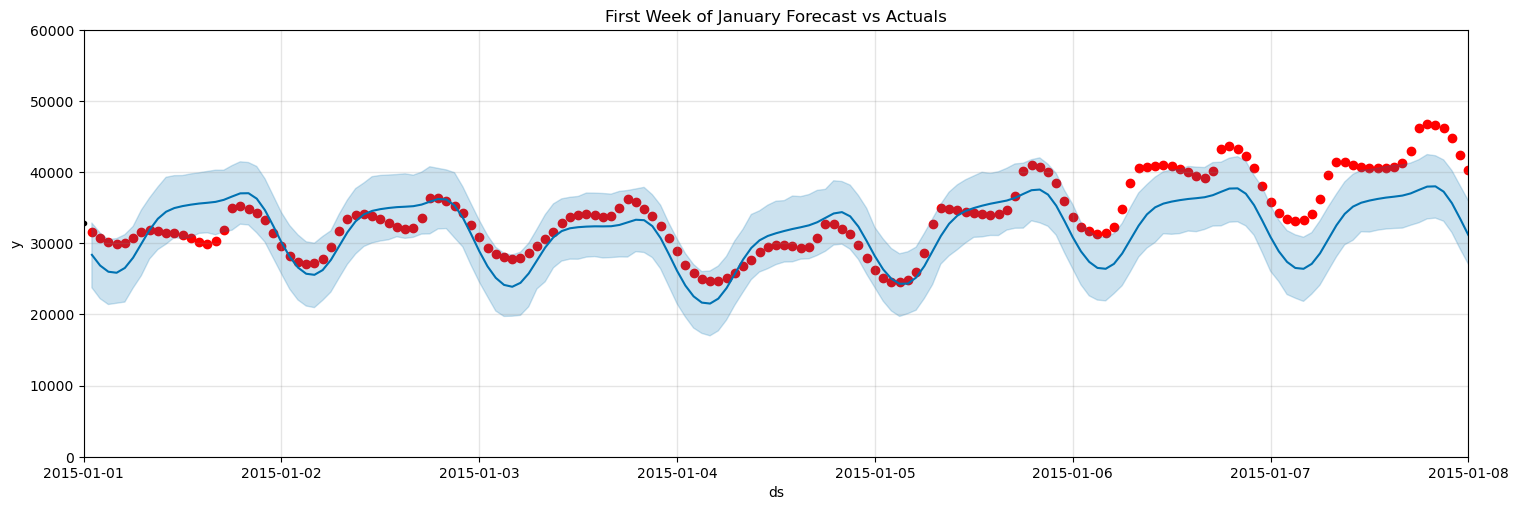

In [25]:
#week plot

f, ax = matplotlib.pyplot.subplots(figsize=(15, 5))
ax.scatter(xTest.index, xTest['PJME_MW'], color='r')
fig = machine.plot(predictions, ax=ax)
ax.set_xbound(lower=pandas.Timestamp('2015-01-01'),
              upper=pandas.Timestamp('2015-01-08'))
ax.set_ylim(0, 60000)
ax.set_title('First Week of January Forecast vs Actuals')
matplotlib.pyplot.show()

# METRICS

In [26]:
from sklearn import metrics

In [27]:
metrics.mean_squared_error(y_true=xTest['PJME_MW'],y_pred=predictions['yhat'])

43776917.80849115

In [28]:
numpy.sqrt(metrics.mean_squared_error(y_true=xTest['PJME_MW'],y_pred=predictions['yhat']))


6616.412759833772

In [29]:
metrics.mean_absolute_error(y_true=xTest['PJME_MW'],y_pred=predictions['yhat'])

5182.687603760565

In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = numpy.array(y_true), numpy.array(y_pred)
    return numpy.mean(numpy.abs((y_true - y_pred) / y_true)) * 100

In [31]:
mean_absolute_percentage_error(xTest['PJME_MW'],predictions['yhat'])

16.508626972243707

# FUTURE PREDICTION 

In [32]:
#with unknown values
future = machine.make_future_dataframe(periods=365*24, freq='h', include_history=False)
forecast = machine.predict(future)

C:\Users\konst\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\konst\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [33]:
future

,ds
0,2015-01-01 01:00:00
1,2015-01-01 02:00:00
2,2015-01-01 03:00:00
3,2015-01-01 04:00:00
4,2015-01-01 05:00:00
...,...
8755,2015-12-31 20:00:00
8756,2015-12-31 21:00:00
8757,2015-12-31 22:00:00
8758,2015-12-31 23:00:00


In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31209.322697,23858.277001,32871.893943,31209.322697,31209.322697,-2823.261647,-2823.261647,-2823.261647,-4430.381997,...,1281.422392,1281.422392,1281.422392,325.697958,325.697958,325.697958,0.0,0.0,0.0,28386.061050
1,2015-01-01 02:00:00,31209.284876,22649.208577,31341.737938,31209.284876,31209.284876,-4327.708248,-4327.708248,-4327.708248,-5927.391284,...,1272.663684,1272.663684,1272.663684,327.019351,327.019351,327.019351,0.0,0.0,0.0,26881.576628
2,2015-01-01 03:00:00,31209.247055,21779.260148,30316.564834,31209.247055,31209.247055,-5199.396321,-5199.396321,-5199.396321,-6790.477791,...,1262.699251,1262.699251,1262.699251,328.382219,328.382219,328.382219,0.0,0.0,0.0,26009.850734
3,2015-01-01 04:00:00,31209.209234,21575.421198,30355.646693,31209.209234,31209.209234,-5340.838206,-5340.838206,-5340.838206,-6922.277506,...,1251.652713,1251.652713,1251.652713,329.786587,329.786587,329.786587,0.0,0.0,0.0,25868.371028
4,2015-01-01 05:00:00,31209.171413,22016.258363,30792.550497,31209.171413,31209.171413,-4666.351087,-4666.351087,-4666.351087,-6237.243470,...,1239.659902,1239.659902,1239.659902,331.232480,331.232480,331.232480,0.0,0.0,0.0,26542.820326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2015-12-31 20:00:00,30878.201650,29009.426311,44215.962461,24899.293371,38012.203707,5798.827220,5798.827220,5798.827220,4451.026214,...,1033.910256,1033.910256,1033.910256,313.890749,313.890749,313.890749,0.0,0.0,0.0,36677.028870
8756,2015-12-31 21:00:00,30878.163829,28011.408854,43759.472979,24898.431813,38012.461588,5031.904664,5031.904664,5031.904664,3695.852267,...,1021.294258,1021.294258,1021.294258,314.758139,314.758139,314.758139,0.0,0.0,0.0,35910.068494
8757,2015-12-31 22:00:00,30878.126009,26631.611611,42365.503219,24897.570256,38012.719470,3408.637638,3408.637638,3408.637638,2084.451187,...,1008.519848,1008.519848,1008.519848,315.666603,315.666603,315.666603,0.0,0.0,0.0,34286.763646
8758,2015-12-31 23:00:00,30878.088188,23824.297569,40254.901961,24896.708698,38012.977351,1206.859700,1206.859700,1206.859700,-105.149384,...,995.392898,995.392898,995.392898,316.616186,316.616186,316.616186,0.0,0.0,0.0,32084.947888


In [35]:
#eg
future2 = machine.make_future_dataframe(periods=365, freq='h', include_history=False)

In [36]:
future2

,ds
0,2015-01-01 01:00:00
1,2015-01-01 02:00:00
2,2015-01-01 03:00:00
3,2015-01-01 04:00:00
4,2015-01-01 05:00:00
...,...
360,2015-01-16 01:00:00
361,2015-01-16 02:00:00
362,2015-01-16 03:00:00
363,2015-01-16 04:00:00
